# Ejercicio 3. Juego de la vida

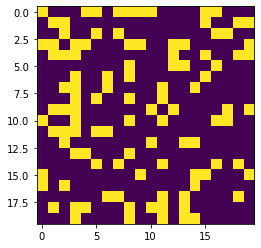

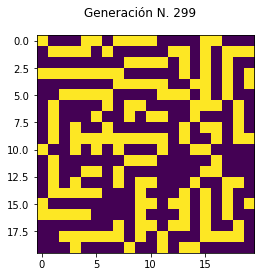

In [41]:
# Importando las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, Image


# Definiendo el grid. Array de dos dimensiones
Grid  = np.zeros((20,20))
#print(Grid)

# Generando posiciones aleatorias dentro del grid que tendrán valor 1 (vivos)
np.random.seed(0)
idx = np.random.randint(20,size=(int(5*(5)),5))
idy = np.random.randint(20,size=(int(5*(5)),5))
Grid[(idx,idy)] = 1



plt.figure()
plt.imshow(Grid)


# Definiendo una funcion con la region entorno a la celda i,j
def region_local(Grid,i,j):
    region = Grid[i-1:i+2,j-1:j+2]
    return region


# Definiendo la funcion logica celda
def logica_celda(array):
    
    valor = array[1,1]
        
    if valor == 1:    # Contando los vecinos vivos
        N = array.sum() - 1
        
        #Si la célula está viva (1) y hay 2 o 3 vecinos vivos asignamos 1
        if N >= 2 and N <=3:
            return array
        
        #Si hay menos de 2 o mas de 3 vecinos vivos, asignamos 0
        else:
            array[1,1] = 0
            return array
    
    else:
        N = array.sum()
        
        #Si la celula esta muerta (0) y hay 3 vecinos vivos asignamos 1
        if N == 3:
            array[1,1] = 1
            return array

        else:
            return array


# Aplicando las reglas a todas las celdas, excepto los bordes
def Ciclo(Grid):
    Tamano_grid = Grid.shape[0]
    for i in range(1,19):
        for j in range(1,19):
            array2 = logica_celda(region_local(Grid,i,j))
            Grid[i][j] = array2[1,1]
    return Grid


# Definiendo animación
def Animar(i):
    Ciclo(Grid)
    ax1.clear()
    ax1.imshow(Grid)
    plt.suptitle('Generación N. {}'.format(i))

fig = plt.figure()
ax1 = fig.add_subplot()
animacion = animation.FuncAnimation(fig, Animar, interval=200,frames= 300)

animacion.save('Juego_de_la_vida.gif', writer='pillow', fps=60)
Image(url='Juego_de_la_vida.gif')


Realizado por María Linares